In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results = {'POWERSAVER': [(9.37, 38.72951316833496), (9.07, 37.56103467941284), (9.07, 37.639822244644165), (8.05, 37.6504225730896), (10.35, 37.475778341293335), (9.61, 37.60912084579468), (8.5, 38.80635333061218), (11.28, 37.5772271156311), (9.86, 37.71284103393555), (10.21, 38.69100332260132), (12.92, 38.67103099822998), (8.72, 37.521318197250366), (7.6, 37.546451568603516), (8.2, 37.83237600326538), (7.46, 37.85769534111023), (8.95, 37.86052703857422), (9.11, 38.65326547622681), (8.66, 38.68223428726196), (10.92, 37.76477599143982), (10.23, 37.87575316429138), (8.93, 37.90162515640259), (8.68, 37.746397495269775), (12.94, 37.625826597213745), (8.95, 37.57797336578369), (8.79, 37.70596981048584), (12.99, 37.555379152297974), (9.48, 37.64805626869202), (8.87, 37.59712243080139), (9.73, 37.636852979660034), (9.74, 37.53708624839783)],
 'BALANCED': [(19.77, 37.021199226379395), (20.61, 37.153010845184326), (20.6, 37.01934099197388), (19.58, 36.98781752586365), (19.74, 37.0844988822937), (19.14, 37.10865306854248), (19.3, 36.99200510978699), (20.36, 36.97817039489746), (19.78, 37.146241903305054), (19.6, 36.99625825881958), (19.33, 37.00780248641968), (19.75, 37.00696587562561), (20.34, 37.07474184036255), (20.55, 37.01115798950195), (19.56, 37.00871658325195), (20.43, 37.090885639190674), (20.1, 36.991920709609985), (19.48, 37.05011177062988), (20.26, 37.22549843788147), (20.46, 37.090569496154785), (19.31, 37.04004263877869), (19.4, 37.167399883270264), (20.42, 37.10887956619263), (19.91, 36.96087574958801), (20.11, 37.181668281555176), (19.48, 37.0370717048645), (20.07, 37.05211305618286), (19.79, 37.09104681015015), (20.68, 36.97257423400879), (20.91, 37.070526123046875)],
 'PERFORMANCE': [(18.53, 36.910958766937256), (19.43, 37.199240922927856), (19.34, 36.95133709907532), (20.44, 36.955161809921265), (19.45, 37.20143151283264), (20.43, 36.965540170669556), (20.28, 37.077622413635254), (20.22, 36.9645938873291), (19.13, 36.95371747016907), (18.87, 36.93086361885071), (19.33, 36.927327156066895), (20.22, 37.161784648895264), (19.16, 36.97538995742798), (19.13, 36.940115213394165), (19.75, 36.940619230270386), (20.39, 36.97929310798645), (19.54, 36.930033922195435), (20.37, 36.94354057312012), (20.81, 36.98719239234924), (19.13, 37.15907382965088), (19.97, 37.24560236930847), (20.12, 36.99865245819092), (19.61, 36.959383964538574), (20.28, 36.935551166534424), (19.66, 36.947596311569214), (19.09, 36.949323892593384), (19.65, 37.01624870300293), (20.2, 37.14617109298706), (20.52, 37.0418746471405), (20.33, 37.18275308609009)]}

for power_mode in results:
  for idx, measurement in enumerate(results[power_mode]):
    results[power_mode][idx]= (measurement[0] * measurement[1], measurement[1])

print(results)
results_energy = {}
results_time = {}
for profile, data in results.items():
    energy, time = zip(*data)
    results_energy[profile] = energy
    results_time[profile] = time
    
df_energy = pd.DataFrame(results_energy)
df_time = pd.DataFrame(results_time)

{'POWERSAVER': [(362.89553838729853, 38.72951316833496), (340.6785845422745, 37.56103467941284), (341.3931877589226, 37.639822244644165), (303.0859017133713, 37.6504225730896), (387.874305832386, 37.475778341293335), (361.4236513280868, 37.60912084579468), (329.85400331020355, 38.80635333061218), (423.8711218643188, 37.5772271156311), (371.84861259460445, 37.71284103393555), (395.0351439237595, 38.69100332260132), (499.62972049713136, 38.67103099822998), (327.18589468002324, 37.521318197250366), (285.35303192138673, 37.546451568603516), (310.2254832267761, 37.83237600326538), (282.4184072446823, 37.85769534111023), (338.85171699523926, 37.86052703857422), (352.1312484884262, 38.65326547622681), (334.9881489276886, 38.68223428726196), (412.39135382652285, 37.76477599143982), (387.4689548707008, 37.87575316429138), (338.4615126466751, 37.90162515640259), (327.6387302589416, 37.746397495269775), (486.8781961679458, 37.625826597213745), (336.322861623764, 37.57797336578369), (331.435474634

In [3]:
df_energy.mean()

POWERSAVER     362.646434
BALANCED       739.697911
PERFORMANCE    732.161418
dtype: float64

In [4]:
df_energy.std()

POWERSAVER     54.545348
BALANCED       18.487874
PERFORMANCE    22.156699
dtype: float64

Text(0, 0.5, 'Energy (J)')

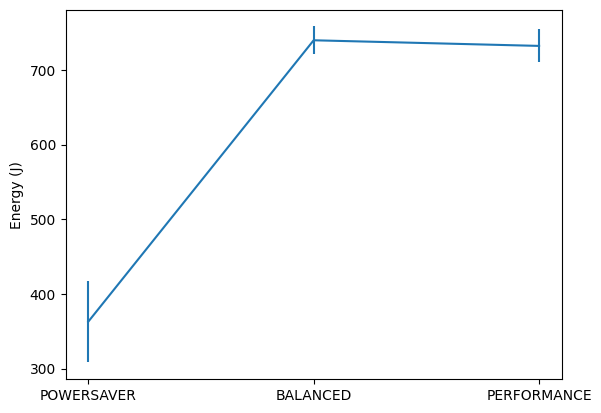

In [6]:
fig, ax = plt.subplots()

ax.errorbar(df_energy.mean().index, df_energy.mean().values, yerr=df_energy.std().values)
ax.set_ylabel('Energy (J)')

Text(0, 0.5, 'Time (s)')

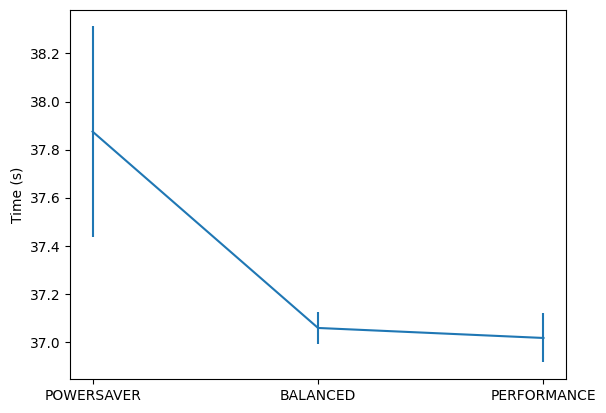

In [7]:
fig, ax = plt.subplots()

ax.errorbar(df_time.mean().index, df_time.mean().values, yerr=df_time.std().values)
ax.set_ylabel('Time (s)')

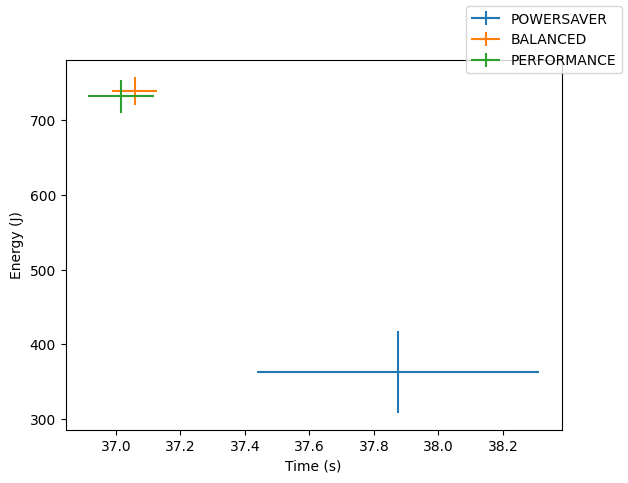

In [8]:
fig, ax = plt.subplots()

ax.errorbar(df_time['POWERSAVER'].mean(), 
            df_energy['POWERSAVER'].mean(), 
            xerr=df_time['POWERSAVER'].std(), 
            yerr=df_energy['POWERSAVER'].std()
           , label='POWERSAVER')

ax.errorbar(df_time['BALANCED'].mean(), 
            df_energy['BALANCED'].mean(), 
            xerr=df_time['BALANCED'].std(), 
            yerr=df_energy['BALANCED'].std()
           , label='BALANCED')

ax.errorbar(df_time['PERFORMANCE'].mean(), 
            df_energy['PERFORMANCE'].mean(), 
            xerr=df_time['PERFORMANCE'].std(), 
            yerr=df_energy['PERFORMANCE'].std(),
           label='PERFORMANCE')

ax.set_ylabel('Energy (J)')
ax.set_xlabel('Time (s)')

fig.legend()

# Exploratory Analysis

Text(0, 0.5, 'Energy (J)')

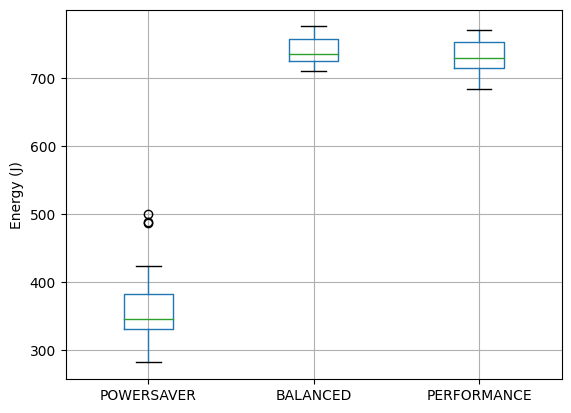

In [9]:
fig, ax = plt.subplots()

df_energy.boxplot(ax=ax)
ax.set_ylabel('Energy (J)')

Text(0, 0.5, 'Time (s)')

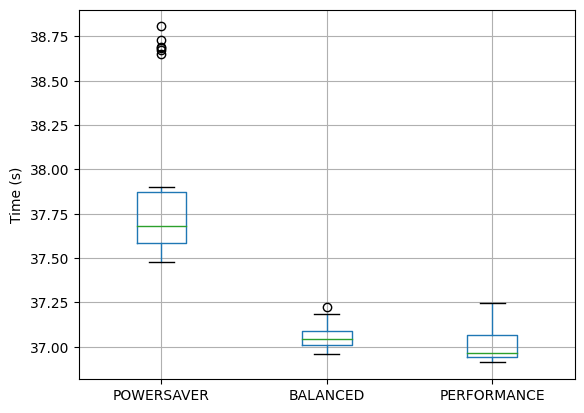

In [10]:
fig, ax = plt.subplots()

df_time.boxplot(ax=ax)
ax.set_ylabel('Time (s)')

Text(0, 0.5, 'Energy (J)')

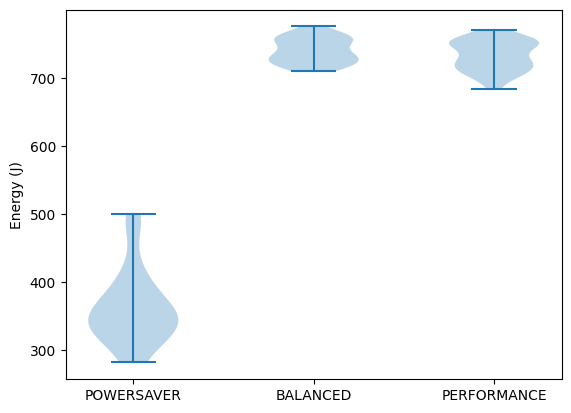

In [11]:
fig, ax = plt.subplots()

ax.violinplot([df_energy['POWERSAVER'].tolist(), df_energy['BALANCED'].tolist(), df_energy['PERFORMANCE'].tolist()])
ax.set_xticks([1.0,2.0,3.0]) 
ax.set_xticklabels(['POWERSAVER', 'BALANCED', 'PERFORMANCE'])
ax.set_ylabel('Energy (J)')

Text(0, 0.5, 'Time (s)')

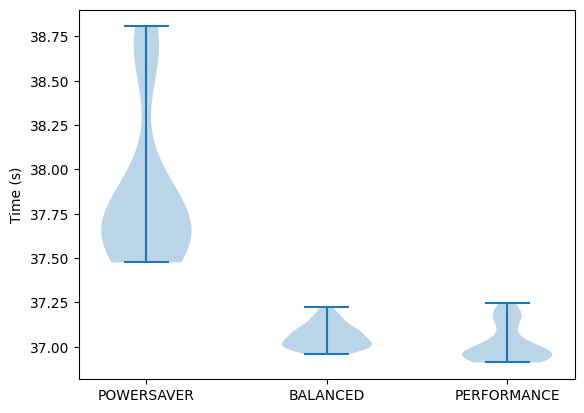

In [12]:
fig, ax = plt.subplots()

ax.violinplot([df_time['POWERSAVER'].tolist(), df_time['BALANCED'].tolist(), df_time['PERFORMANCE'].tolist()])
ax.set_xticks([1.0,2.0,3.0]) 
ax.set_xticklabels(['POWERSAVER', 'BALANCED', 'PERFORMANCE'])
ax.set_ylabel('Time (s)')

Text(0.5, 0, 'Energy (J)')

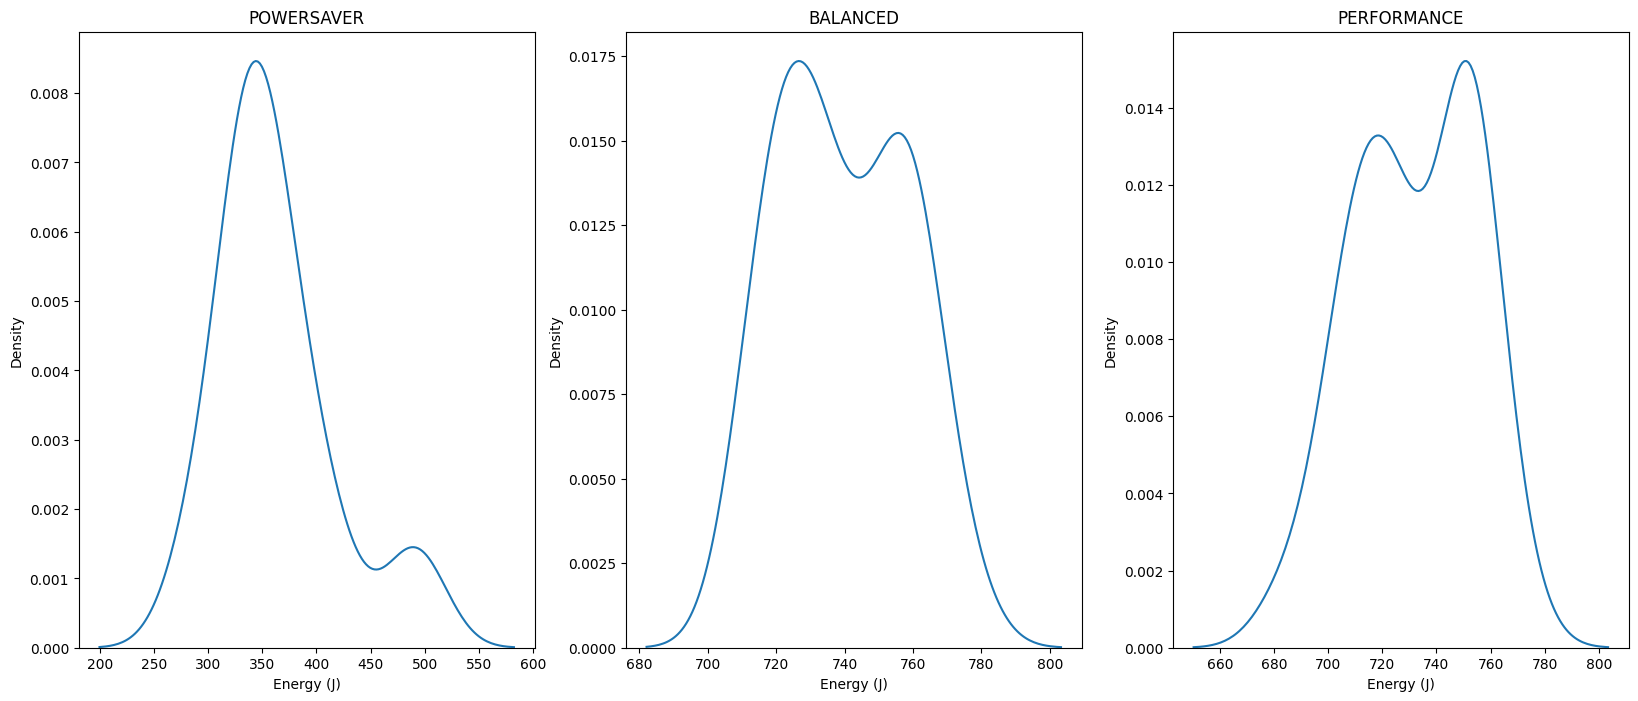

In [13]:
fig, axs = plt.subplots(1,3, figsize=(20,8))

sns.kdeplot(df_energy['POWERSAVER'],ax=axs[0])
sns.kdeplot(df_energy['BALANCED'],ax=axs[1])
sns.kdeplot(df_energy['PERFORMANCE'],ax=axs[2])
axs[0].set_title('POWERSAVER')
axs[1].set_title('BALANCED')
axs[2].set_title('PERFORMANCE')
axs[0].set_xlabel('Energy (J)')
axs[1].set_xlabel('Energy (J)')
axs[2].set_xlabel('Energy (J)')

Text(0.5, 0, 'Time (s)')

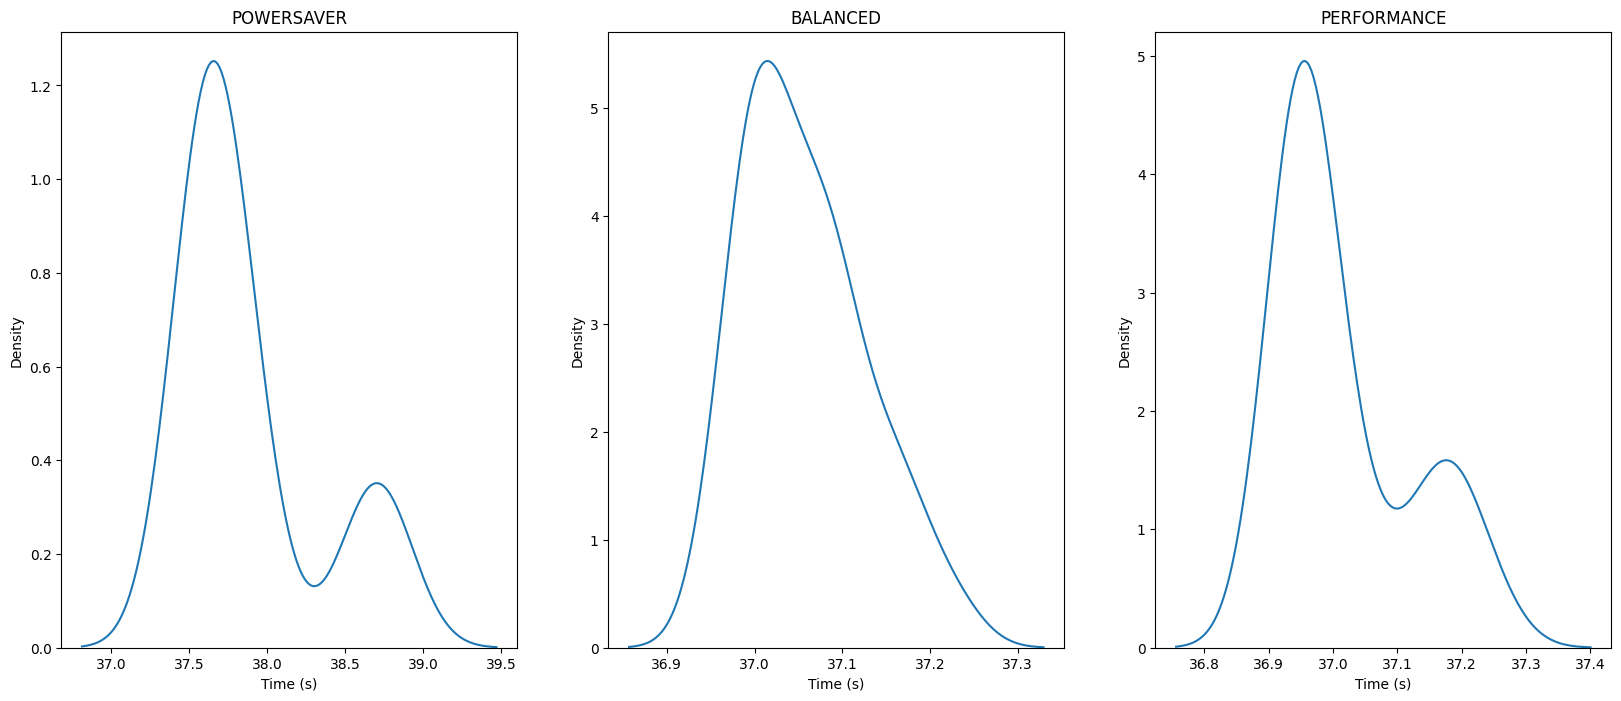

In [14]:
fig, axs = plt.subplots(1,3, figsize=(20,8))

sns.kdeplot(df_time['POWERSAVER'],ax=axs[0])
sns.kdeplot(df_time['BALANCED'],ax=axs[1])
sns.kdeplot(df_time['PERFORMANCE'],ax=axs[2])
axs[0].set_title('POWERSAVER')
axs[1].set_title('BALANCED')
axs[2].set_title('PERFORMANCE')
axs[0].set_xlabel('Time (s)')
axs[1].set_xlabel('Time (s)')
axs[2].set_xlabel('Time (s)')

Text(0.5, 0, 'Energy (J)')

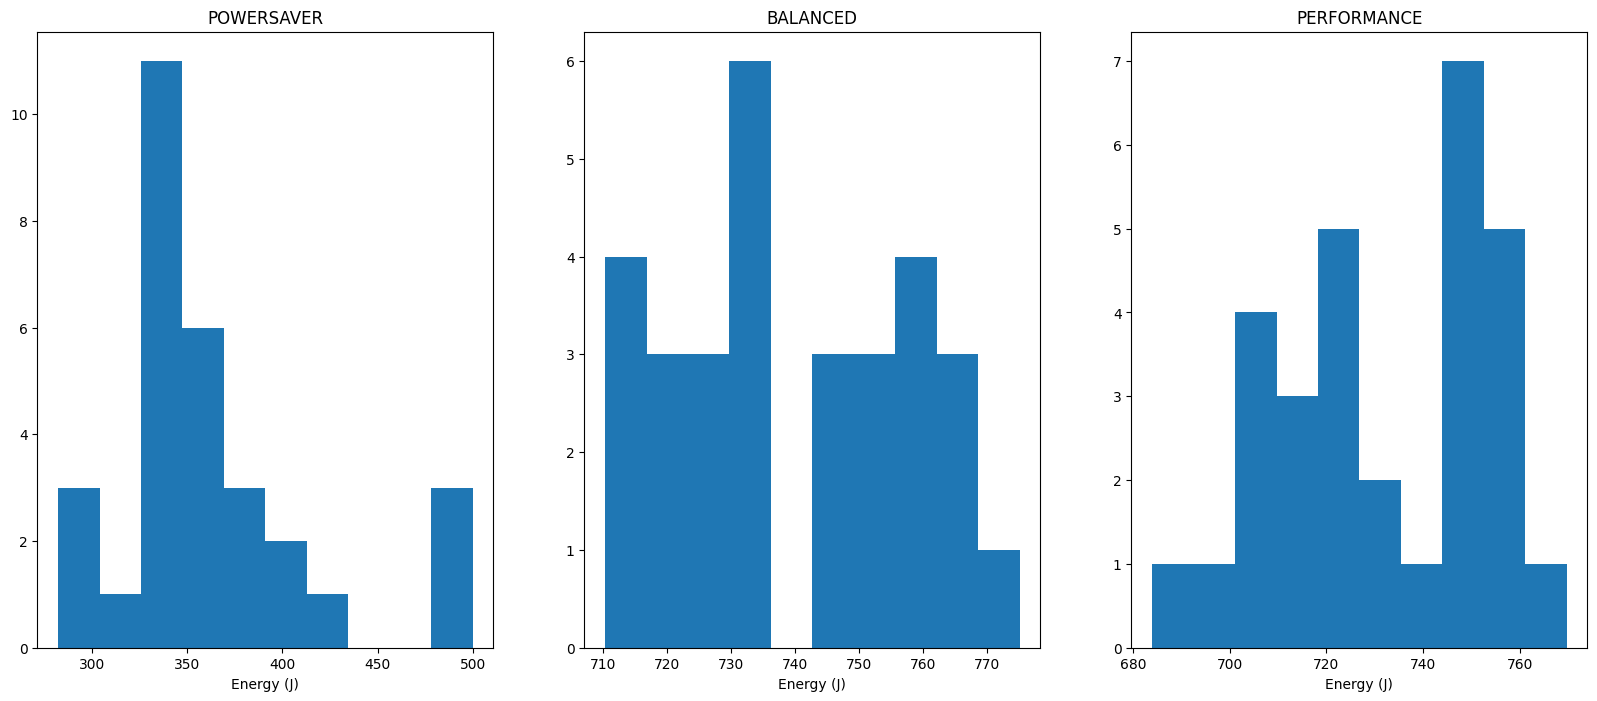

In [16]:
fig, axs = plt.subplots(1,3, figsize=(20,8))

axs[0].hist(df_energy['POWERSAVER'])
axs[1].hist(df_energy['BALANCED'])
axs[2].hist(df_energy['PERFORMANCE'])
axs[0].set_title('POWERSAVER')
axs[1].set_title('BALANCED')
axs[2].set_title('PERFORMANCE')
axs[0].set_xlabel('Energy (J)')
axs[1].set_xlabel('Energy (J)')
axs[2].set_xlabel('Energy (J)')

Text(0.5, 0, 'Time (s)')

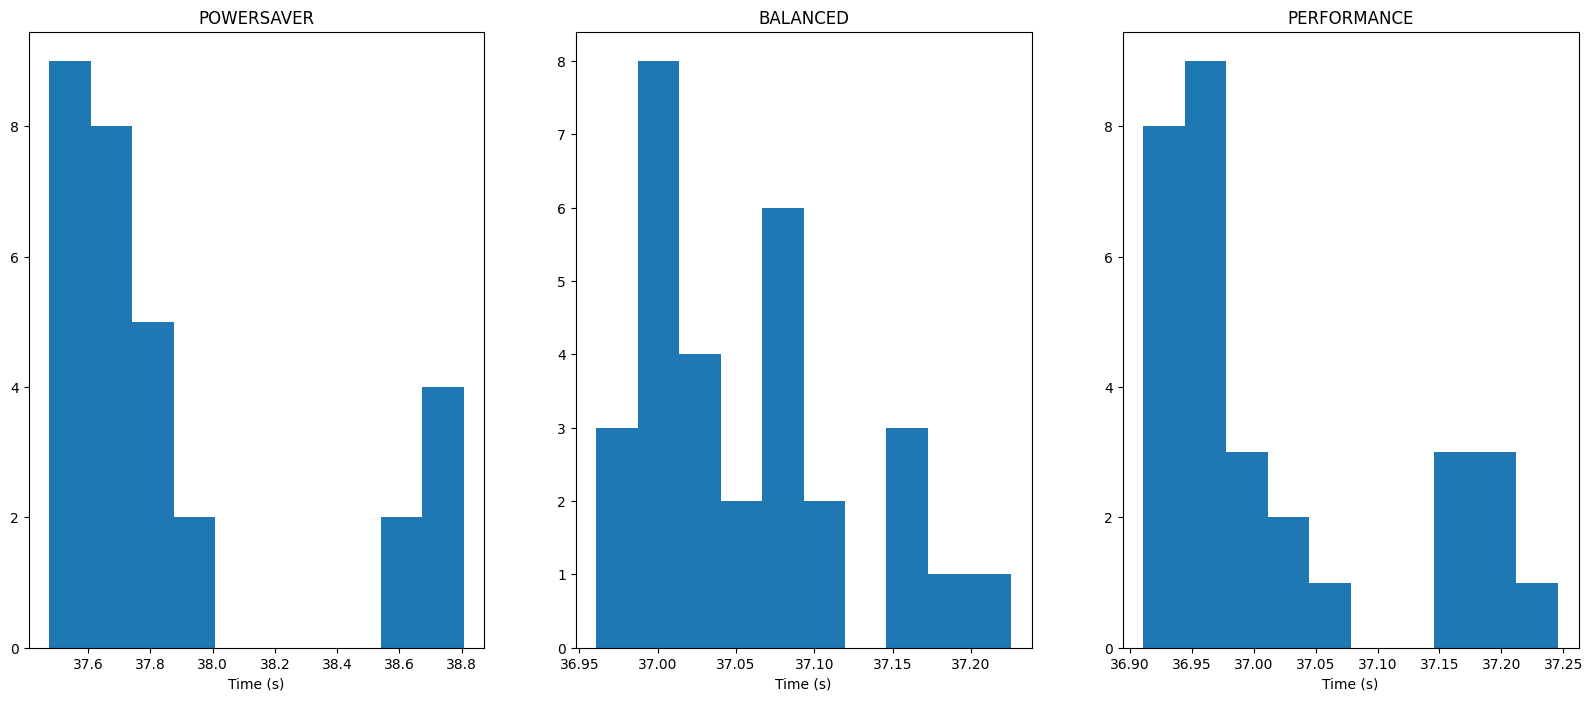

In [15]:
fig, axs = plt.subplots(1,3, figsize=(20,8))

axs[0].hist(df_time['POWERSAVER'])
axs[1].hist(df_time['BALANCED'])
axs[2].hist(df_time['PERFORMANCE'])
axs[0].set_title('POWERSAVER')
axs[1].set_title('BALANCED')
axs[2].set_title('PERFORMANCE')
axs[0].set_xlabel('Time (s)')
axs[1].set_xlabel('Time (s)')
axs[2].set_xlabel('Time (s)')

## Shapiro-Wilk test (check normality)

In [17]:
from scipy.stats import *

In [18]:
p_saver = shapiro(df_energy['POWERSAVER'])[1]
p_balanced = shapiro(df_energy['BALANCED'])[1]
p_performance = shapiro(df_energy['PERFORMANCE'])[1]

for profile, p_value in zip(df_energy.columns, [p_saver, p_balanced, p_performance]):
    test = 'ARE' if p_value>=0.05 else 'ARE NOT'
    print(f'The energy values for {profile} {test} Normal, p-value={p_value}')

The energy values for POWERSAVER ARE NOT Normal, p-value=0.0029932153411209583
The energy values for BALANCED ARE Normal, p-value=0.12952807545661926
The energy values for PERFORMANCE ARE Normal, p-value=0.10402566194534302


In [19]:
p_saver = shapiro(df_time['POWERSAVER'])[1]
p_balanced = shapiro(df_time['BALANCED'])[1]
p_performance = shapiro(df_time['PERFORMANCE'])[1]

for profile, p_value in zip(df_energy.columns, [p_saver, p_balanced, p_performance]):
    test = 'ARE' if p_value>=0.05 else 'ARE NOT'
    print(f'The time values for {profile} {test} Normal, p-value={p_value}')

The time values for POWERSAVER ARE NOT Normal, p-value=3.326747673781938e-06
The time values for BALANCED ARE Normal, p-value=0.0941784605383873
The time values for PERFORMANCE ARE NOT Normal, p-value=5.7670902606332675e-05


## Remove outliers

In [20]:
def remove_out_z_score(data):
    mean = data.mean()
    std = data.std()
    no_outliers = []
    for i in data:
        z = (i-mean)/std
        if z < 3:
            no_outliers.append(i)
    return no_outliers

In [21]:
energy_powersaver = remove_out_z_score(df_energy['POWERSAVER'])

len(energy_powersaver)

30

In [22]:
time_powersaver = remove_out_z_score(df_time['POWERSAVER'])

len(time_powersaver)

30

In [23]:
time_performance = remove_out_z_score(df_time['PERFORMANCE'])

len(time_performance)

30

We cannot remove any outliers (all are within three standard deviations). Therefore we conclude the data is not normal in the identified cases. This is expected since our experiments are AI executions.

# Statistical significance

Compare energy between Performance and Balanced (Both are Normal therefore we use the Welch's t-test)

In [24]:
ttest_ind(df_energy['BALANCED'], df_energy['PERFORMANCE'], equal_var=False)

Ttest_indResult(statistic=1.4304749212820653, pvalue=0.15811768822388678)

Since the p-value is greater than 0.05 then we conclude that the difference in energy consumption for Balanced and Performance profile is not statistically significant.

All other comparasion will have at least one sample that is not normal therefore we will use from now on the Mann-Whitney U test

We compare the profile Powersaver with Balanced and Performance in terms of energy.

In [25]:
mannwhitneyu(df_energy['POWERSAVER'], df_energy['BALANCED'], alternative='two-sided')

MannwhitneyuResult(statistic=0.0, pvalue=3.019859359162157e-11)

In [26]:
mannwhitneyu(df_energy['POWERSAVER'], df_energy['PERFORMANCE'], alternative='two-sided')

MannwhitneyuResult(statistic=0.0, pvalue=3.019859359162157e-11)

In both cases the p-value is less than 0.05 therefore the difference is statistically significant meaning the profile Powersaver is indeed more energy efficient.

### Check time 

In [27]:
mannwhitneyu(df_time['BALANCED'], df_time['PERFORMANCE'], alternative='two-sided')

MannwhitneyuResult(statistic=642.0, pvalue=0.004637118106215593)

In [28]:
mannwhitneyu(df_time['POWERSAVER'], df_time['BALANCED'], alternative='two-sided')

MannwhitneyuResult(statistic=900.0, pvalue=3.019859359162157e-11)

In [29]:
mannwhitneyu(df_time['POWERSAVER'], df_time['PERFORMANCE'], alternative='two-sided')

MannwhitneyuResult(statistic=900.0, pvalue=3.019859359162157e-11)

All the results according to time are statistically significant meaning that in the following ascending order the profiles take more time to perform the computations: Powersaver, Balanced, Performance

# Effect Size

## Median Difference

### Energy

In [30]:
df_energy['BALANCED'].median() - df_energy['POWERSAVER'].median()

388.5596323871613

In [31]:
df_energy['PERFORMANCE'].median() - df_energy['POWERSAVER'].median()

381.7110402822494

In both cases the difference of median is around 10 W making the difference relevant.

### Time

In [32]:
df_time['BALANCED'].median() - df_time['PERFORMANCE'].median()

0.08001017570495605

In [33]:
df_time['POWERSAVER'].median() - df_time['BALANCED'].median()

0.6331189870834351

In [34]:
df_time['POWERSAVER'].median() - df_time['PERFORMANCE'].median()

0.7131291627883911

In this case the median does not show a huge difference in time.

## Percentage of pairs

In [35]:
import itertools 

def pair_percentage(data1, data2):
    pairs = list(itertools.product(data1.tolist(), data2.tolist()))

    supporting_pairs = 0
    for pair in pairs:
        if pair[0]>pair[1]:
            supporting_pairs+=1

    print(supporting_pairs/len(pairs))

### Energy

In [36]:
pair_percentage(df_energy['BALANCED'], df_energy['POWERSAVER'])

1.0


In [37]:
pair_percentage(df_energy['PERFORMANCE'], df_energy['POWERSAVER'])

1.0


The difference between powersaver and the other two profiles is confirmed to be significant since all pairs show that performance is more energy efficient than the other two profiles.

### Time

In [38]:
pair_percentage(df_time['BALANCED'], df_time['PERFORMANCE'])

0.7133333333333334


In [39]:
pair_percentage(df_time['POWERSAVER'], df_time['BALANCED'])

1.0


In [40]:
pair_percentage(df_time['POWERSAVER'], df_time['PERFORMANCE'])

1.0


We can see that the percentages are all above 50% supporting the median result. Furthermore it is also more clear that powersaver takes more time than balanced and performance, but the difference between the latter is not as striking.

# Cliffs delta

In [43]:
def cliffs_delta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

## Energy

In [44]:
cliffs_delta(df_energy['BALANCED'].tolist(), df_energy['POWERSAVER'].tolist())

(1.0, 'large')

In [45]:
cliffs_delta(df_energy['PERFORMANCE'].tolist(), df_energy['POWERSAVER'].tolist())

(1.0, 'large')

## Time

In [49]:
cliffs_delta(df_time['PERFORMANCE'].tolist(), df_time['BALANCED'].tolist())

(-0.4266666666666667, 'medium')

In [50]:
cliffs_delta(df_time['BALANCED'].tolist(), df_time['POWERSAVER'].tolist())

(-1.0, 'large')

In [51]:
cliffs_delta(df_time['PERFORMANCE'].tolist(), df_time['POWERSAVER'].tolist())

(-1.0, 'large')